Creating 1D visualization for Gaussian model...
  - 1D visualization saved to: variogram_visualizations\gaussian_1d.png
Creating 2D visualization for Gaussian model...
  - 2D visualization saved to: variogram_visualizations\gaussian_2d.png
Creating 3D visualization for Gaussian model...
  - 3D visualization saved to: variogram_visualizations\gaussian_3d.png


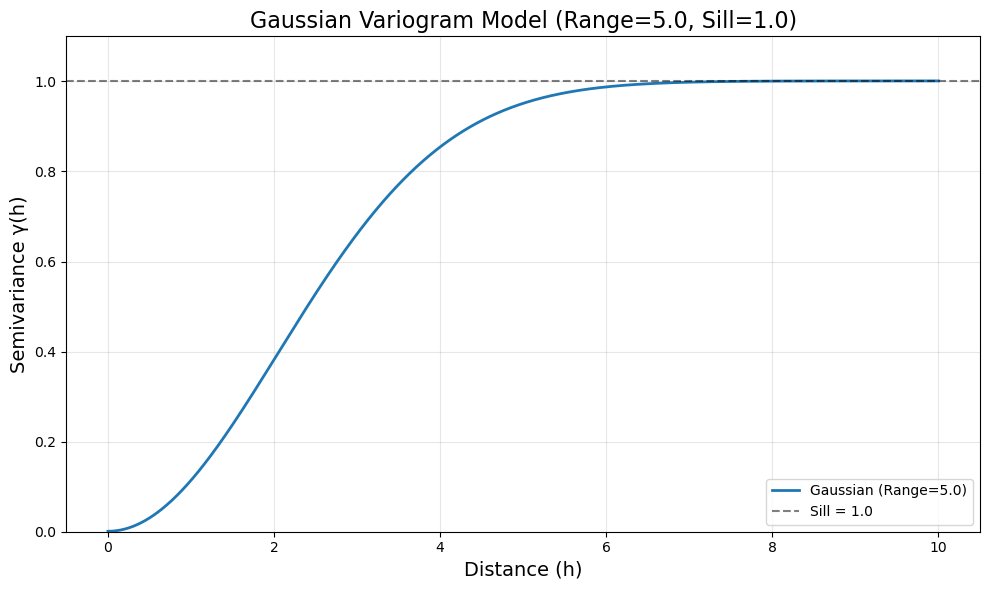

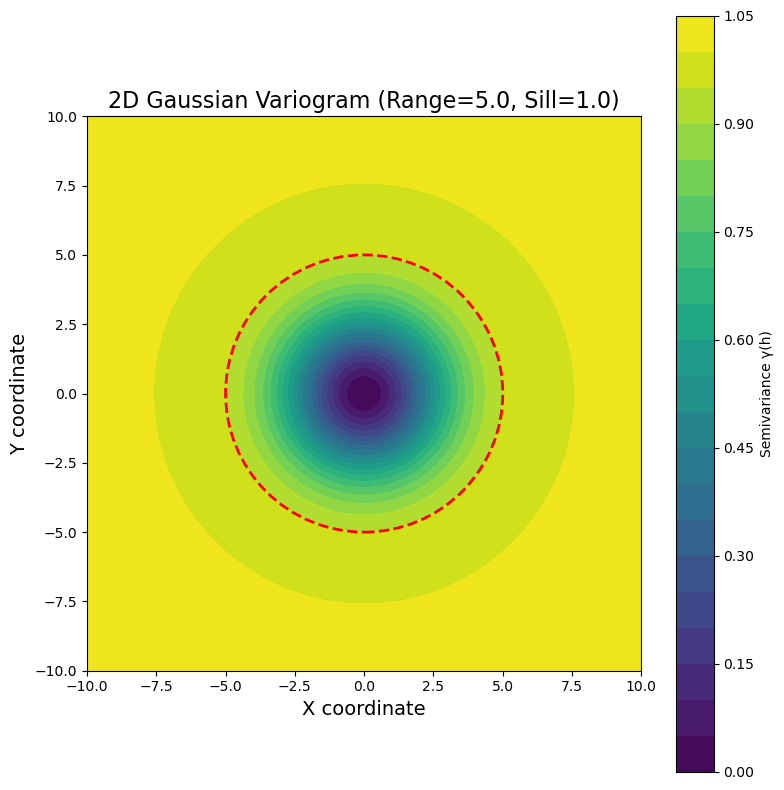

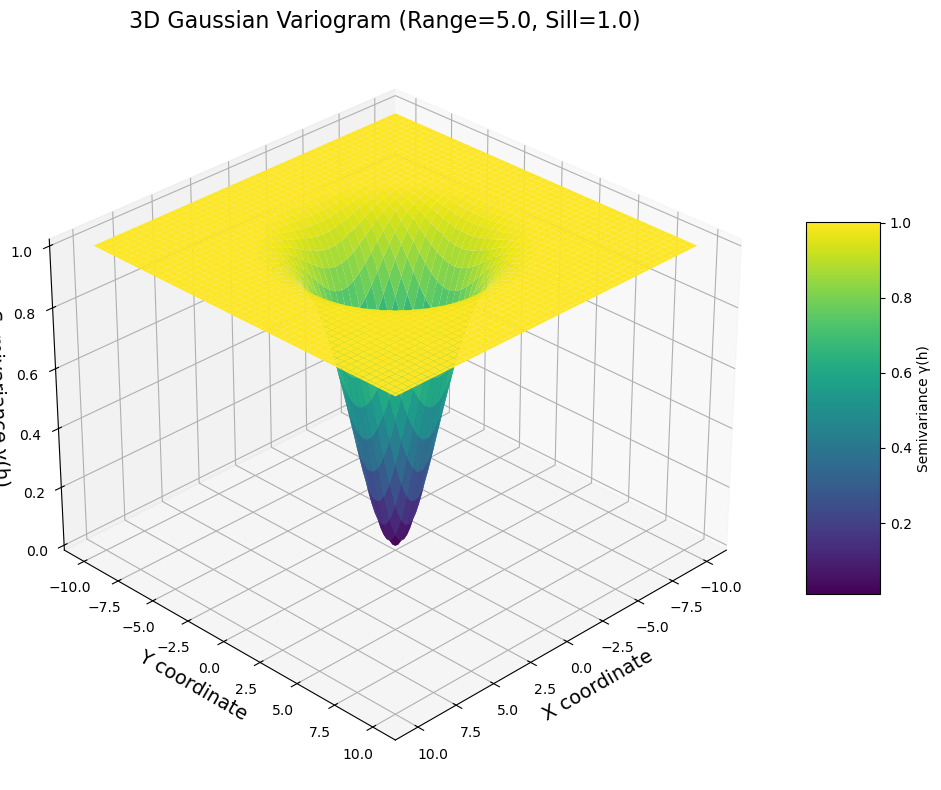

In [3]:
"""
Variogram Model Visualization in 1D, 2D, and 3D

This script demonstrates how to create multi-dimensional visualizations
for a specific theoretical variogram model using the variogram_package.
"""

import numpy as np
import matplotlib.pyplot as plt
from variogram_package import VariogramVisualizer

def visualize_variogram_model(
    model_name, 
    sill=1.0, 
    range_param=5.0,
    output_directory=None,
    **model_params
):
    """Generate 1D, 2D, and 3D visualizations for a specific variogram model.
    
    Creates standardized visualizations to analyze spatial continuity patterns
    and model characteristics from different dimensional perspectives.
    
    Args:
        model_name (str): Name of the variogram model to visualize
        sill (float, optional): Sill parameter value. Defaults to 1.0.
        range_param (float, optional): Range parameter value. Defaults to 5.0.
        output_directory (str, optional): Directory for saving visualizations. 
            If None, visualizations are displayed but not saved.
        **model_params: Additional model-specific parameters (e.g., smoothness 
            for K-Bessel model)
            
    Returns:
        tuple: (fig_1d, fig_2d, fig_3d) containing the three figure objects
        
    Raises:
        ValueError: If the specified model name is not available
    """
    # Initialize the variogram visualizer
    visualizer = VariogramVisualizer()
    
    # Validate model name
    if model_name not in visualizer.models:
        available_models = list(visualizer.models.keys())
        raise ValueError(f"Unknown model: {model_name}. Available models: {available_models}")
    
    # Create output directory if specified
    if output_directory:
        import os
        os.makedirs(output_directory, exist_ok=True)
    
    # Get full model name for display
    model_instance = visualizer.models[model_name]
    full_model_name = model_instance.name
    
    # 1. Create 1D visualization (profile view)
    print(f"Creating 1D visualization for {full_model_name} model...")
    fig_1d = visualizer.plot_1d_comparison(
        models=[model_name],
        sill=sill,
        range_params={model_name: range_param},
        title=f"{full_model_name} Variogram Model (Range={range_param}, Sill={sill})",
        figsize=(10, 6),
        **model_params
    )
    
    # Save 1D visualization if output directory is specified
    if output_directory:
        output_path = os.path.join(output_directory, f"{model_name}_1d.png")
        fig_1d.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"  - 1D visualization saved to: {output_path}")
    
    # 2. Create 2D visualization (contour view)
    print(f"Creating 2D visualization for {full_model_name} model...")
    fig_2d = visualizer.plot_2d_contour(
        model_name=model_name,
        sill=sill,
        range_param=range_param,
        show_range_circle=True,
        title=f"2D {full_model_name} Variogram (Range={range_param}, Sill={sill})",
        figsize=(8, 8),
        **model_params
    )
    
    # Save 2D visualization if output directory is specified
    if output_directory:
        output_path = os.path.join(output_directory, f"{model_name}_2d.png")
        fig_2d.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"  - 2D visualization saved to: {output_path}")
    
    # 3. Create 3D visualization (surface view)
    print(f"Creating 3D visualization for {full_model_name} model...")
    fig_3d = visualizer.plot_3d_surface(
        model_name=model_name,
        sill=sill,
        range_param=range_param,
        title=f"3D {full_model_name} Variogram (Range={range_param}, Sill={sill})",
        elevation=30,  # Viewing angle elevation
        azimuth=45,    # Viewing angle azimuth
        figsize=(10, 8),
        **model_params
    )
    
    # Save 3D visualization if output directory is specified
    if output_directory:
        output_path = os.path.join(output_directory, f"{model_name}_3d.png")
        fig_3d.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"  - 3D visualization saved to: {output_path}")
    
    # Return all three figure objects for further customization if needed
    return fig_1d, fig_2d, fig_3d

# Example usage
if __name__ == "__main__":
    # Basic usage with standard parameters
    figs = visualize_variogram_model(
        model_name="gaussian",
        output_directory="variogram_visualizations"
    )
    
    # # Advanced usage with model-specific parameters
    # figs_kbessel = visualize_variogram_model(
    #     model_name="k_bessel",
    #     range_param=4.0,
    #     output_directory="variogram_visualizations",
    #     smoothness=0.75  # K-Bessel specific parameter
    # )
    
    # Display figures
    plt.show()